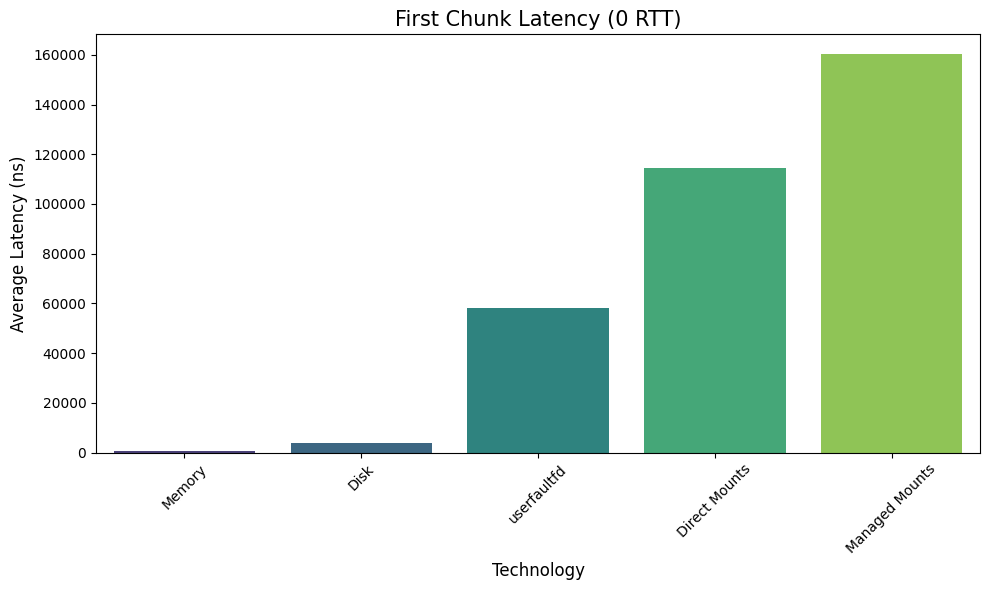

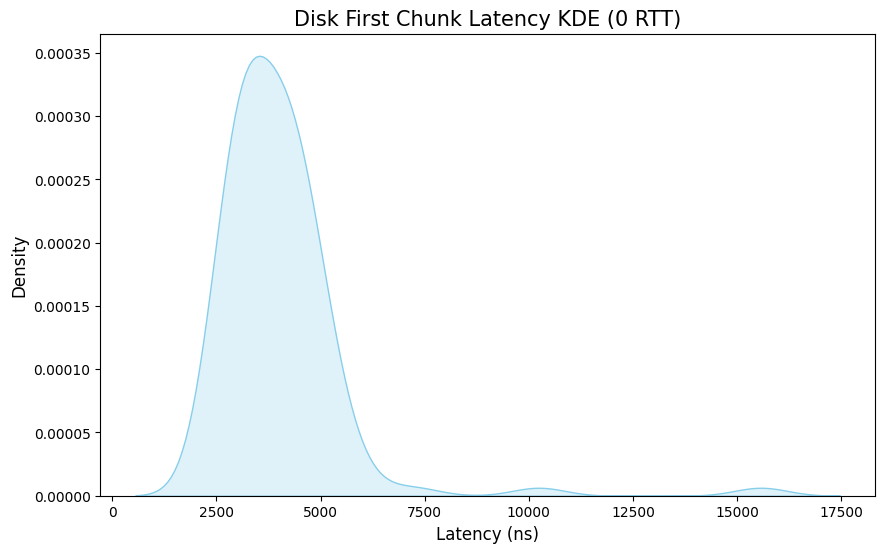

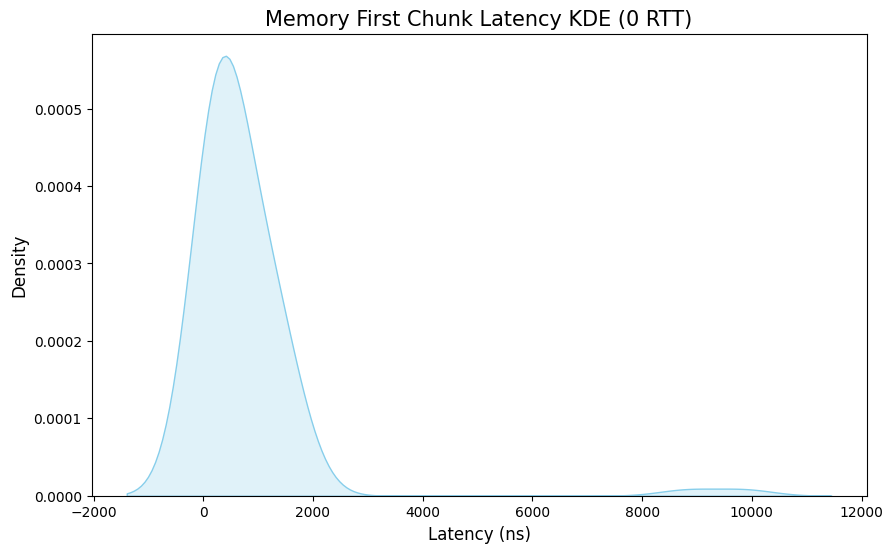

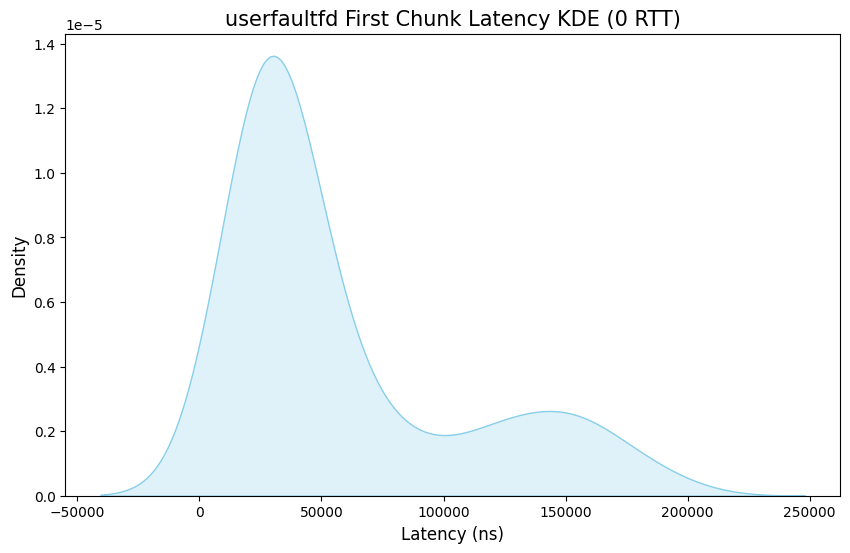

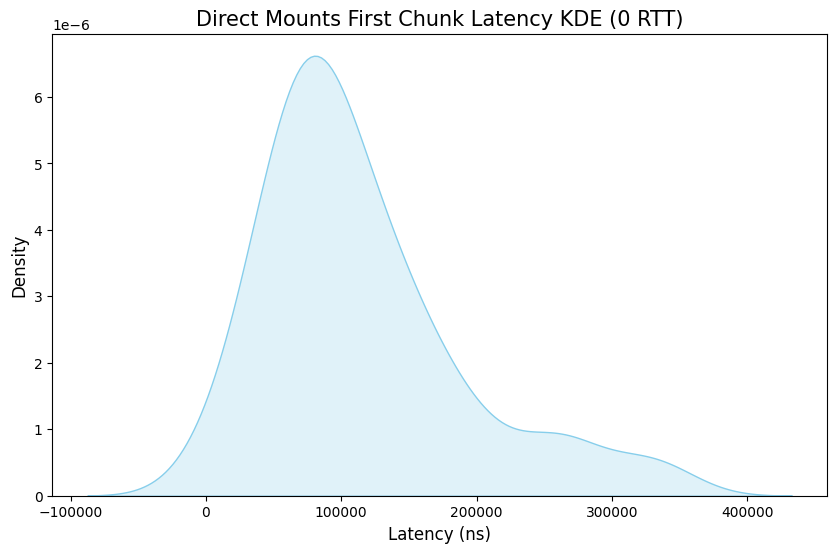

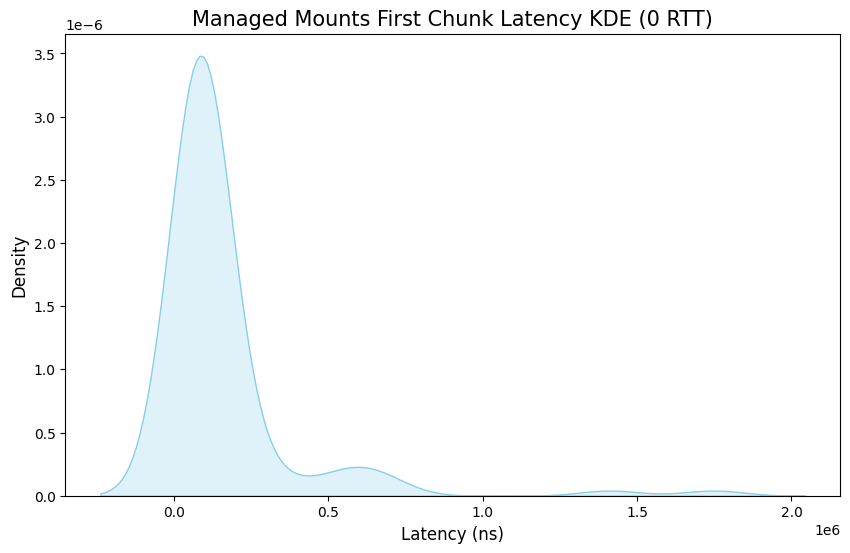

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
data = pd.read_csv('../bench/latency-first-chunk-rtt0/results.csv')

# Rename columns for ease of use
column_names = {
    "First Chunk Latency for Disk (0ms RTT) (ns)": "Disk",
    "First Chunk Latency for Memory (0ms RTT) (ns)": "Memory",
    "First Chunk Latency for userfaultfd (0ms RTT) (ns)": "userfaultfd",
    "First Chunk Latency for Direct Mounts (0ms RTT) (ns)": "Direct Mounts",
    "First Chunk Latency for Managed Mounts (0ms RTT) (ns)": "Managed Mounts"
}
data.rename(columns=column_names, inplace=True)

# Calculate the mean of each column and sort them
mean_latency = data.mean().sort_values()

# Plot the average of each column
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_latency.index, y=mean_latency.values, palette="viridis")
plt.title("First Chunk Latency (0 RTT)", fontsize=15)
plt.ylabel("Average Latency (ns)", fontsize=12)
plt.xlabel("Technology", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a separate KDE plot for each technology
for tech in data.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data[tech], color='skyblue', fill=True)
    plt.title(f'{tech} First Chunk Latency KDE (0 RTT)', fontsize=15)
    plt.xlabel('Latency (ns)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

# Calculate the mean of each column and sort them for the new data
new_mean_latency = data.mean().sort_values()